# Exploratory Data Analysis
## Descriptive Analysis of MBA Students data
***
Trainer : - Rajesh Jakhotia

### Data Import

In [1]:
# Import the required packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [2]:
mba_df = pd.read_csv("EDA_DHS.csv")

In [3]:
mba_df.shape

(200, 9)

In [4]:
mba_df.head()

,sr_no,mba_specialization,mba_grades,gender,age,pg_degree,grad_degree,grad_pass_year,grad_pct
0,1,Business Analytics,8.2,M,26,No,B.E. / B.Tech,2011,61.65
1,2,Marketing,8.5,F,21,No,"B.B.A, B.M.S., Others",2016,76.75
2,3,Marketing,8.9,M,21,No,B.Sc,2015,77.25
3,4,Marketing,8.2,F,23,No,B.Com,2014,84.21
4,5,Marketing,7.2,F,21,No,"B.B.A, B.M.S., Others",2015,71.00


## Analysis of a Single Variable

## Analysis of a Single Categorical Variable
### Frequency Distribution
***
### Analysis of MBA Specialization Field

In [5]:
freq_table = mba_df["mba_specialization"].value_counts().to_frame()
freq_table.reset_index(inplace=True) # reset index
freq_table.columns = [   "Specialization"   , 'Cnt_Students'] # rename columns
freq_table["Pct_Students"] = freq_table['Cnt_Students'] / sum(freq_table['Cnt_Students'])
freq_table

,Specialization,Cnt_Students,Pct_Students
0,Finance,80,0.400
1,Marketing,70,0.350
2,Business Analytics,25,0.125
3,HR,25,0.125


### Bar Plot

<BarContainer object of 4 artists>

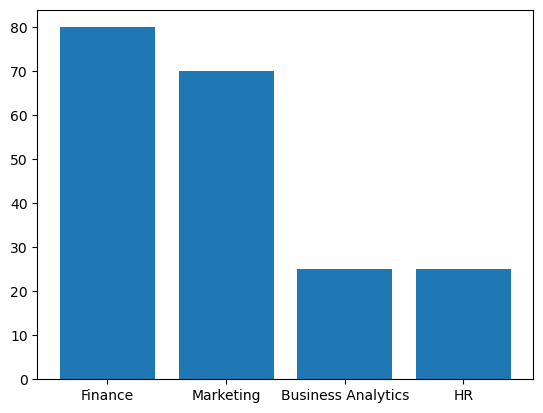

In [6]:
# Simple one line syntax to make bar plot
plt.bar(freq_table['Specialization'], freq_table['Cnt_Students']) 

Text(0, 0.5, '# Students')

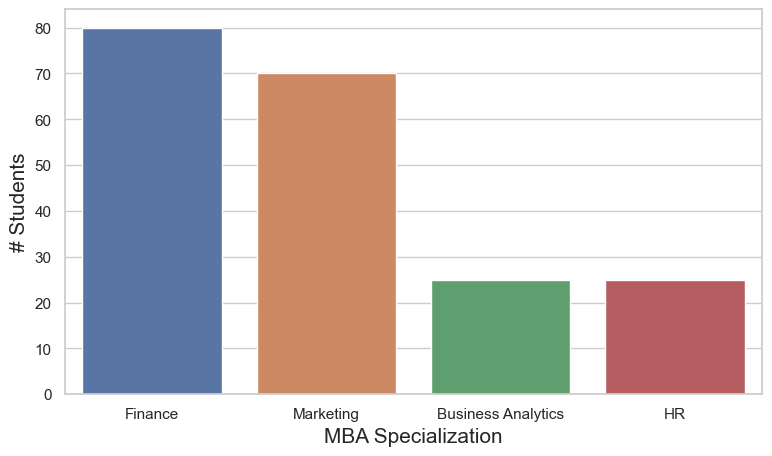

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(9,5))
ax = sns.barplot( x = freq_table['Specialization'], 
            y = freq_table['Cnt_Students'])
ax.set_xlabel("MBA Specialization",fontsize=15)
ax.set_ylabel("# Students",fontsize=15)


### Pie Plot

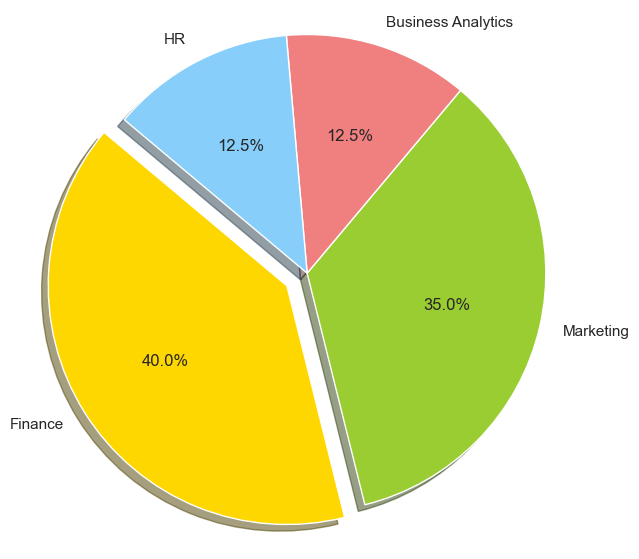

In [8]:
plt.figure(figsize=(7,7))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(freq_table['Cnt_Students'],
        labels=freq_table['Specialization'],
        explode=explode,  
        colors=colors,
        autopct='%1.1f%%', 
        shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Y-data Profiling

In [9]:
# conda install -c conda-forge ydata-profiling
# jupyter notebook --version (error displaying widget with version 7.8
# Run the command - pip install -U ipywidgets  to resolve the error displying widget error
from ydata_profiling import ProfileReport
report = ProfileReport(mba_df, title = "MBA Data Analysis")
report.to_notebook_iframe()
report.to_file("mba_students_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Remaining part of the code is self-practice

## Analysis of Single Categorical Variable | Graduation Degree

In [10]:
freq_grad_deg = mba_df['grad_degree'].value_counts()
freq_grad_deg.count()

4

In [11]:
freq_grad_deg

grad_degree
B.Com                    75
B.E. / B.Tech            63
B.B.A, B.M.S., Others    50
B.Sc                     12
Name: count, dtype: int64

In [12]:

freq_grad_deg = mba_df['grad_degree'].value_counts().to_frame()
freq_grad_deg.reset_index(inplace=True) # reset index
freq_grad_deg.columns = [   "Graduation Degree"   , 'Cnt_Students'] # rename columns
freq_grad_deg["Pct_Students"] = freq_grad_deg['Cnt_Students'] / sum(freq_grad_deg['Cnt_Students'])
freq_grad_deg

,Graduation Degree,Cnt_Students,Pct_Students
0,B.Com,75,0.375
1,B.E. / B.Tech,63,0.315
2,"B.B.A, B.M.S., Others",50,0.250
3,B.Sc,12,0.060


# Analysis of a Single Continuous Variable
***
## Histograms & Density Plots

In [13]:
grades_mean = round(mba_df["mba_grades"].mean(),1)
grades_median = round(mba_df["mba_grades"].median(),1)
grades_min = round(mba_df["mba_grades"].min(),1)
grades_max = round(mba_df["mba_grades"].max(),1)
grades_std = round(np.std(mba_df["mba_grades"]),1)

In [14]:
print("Mean grade of the students is :" , grades_mean)
print("Median grade of the students is :" , grades_median)
print("Min grade of the students is :" , grades_min)
print("Max grade of the students is :" , grades_max)
print("Std. Dev of the students grade is :" , grades_std)

Mean grade of the students is : 7.4
Median grade of the students is : 7.5
Min grade of the students is : 6.3
Max grade of the students is : 9.2
Std. Dev of the students grade is : 0.6


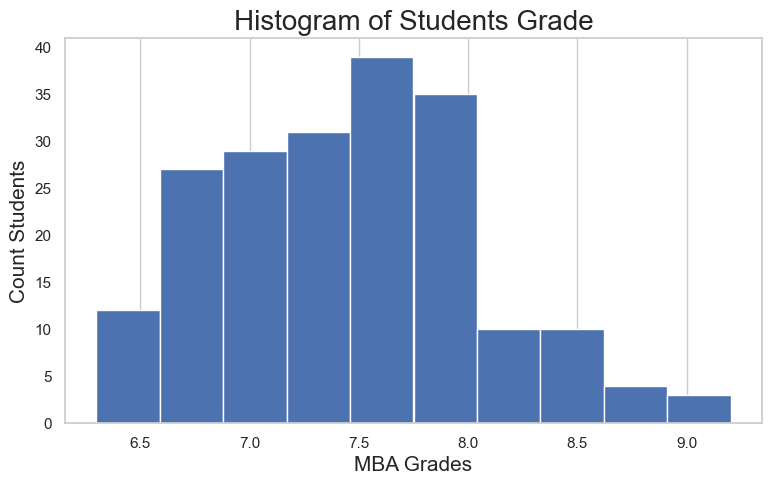

In [15]:
plt.figure(figsize=(9,5))
plt.hist(mba_df['mba_grades'], rwidth = 1)

plt.title("Histogram of Students Grade", fontsize=20)
plt.xlabel('MBA Grades', fontsize=15)
plt.ylabel('Count Students', fontsize=15)
plt.grid(axis='y')

C:\Users\rjakh\anaconda3\envs\PyEnv3117\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


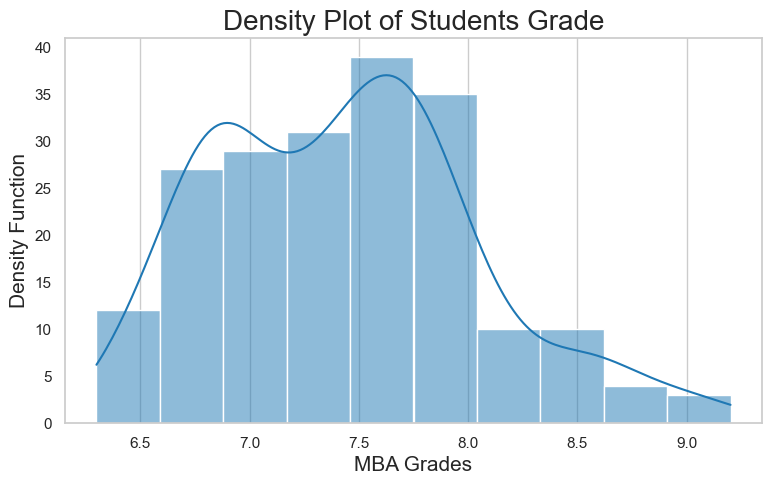

In [16]:
plt.figure(figsize=(9,5))
sns.histplot(mba_df.mba_grades,            
              bins=10, 
             kde=True, color='#1F78B4'
            )
## KDE stands for Kernel Density Estimate

plt.title("Density Plot of Students Grade", fontsize=20)
plt.xlabel('MBA Grades', fontsize=15)
plt.ylabel('Density Function', fontsize=15)
plt.grid(axis='y')

Text(0.5, 0, 'MBA Grades')

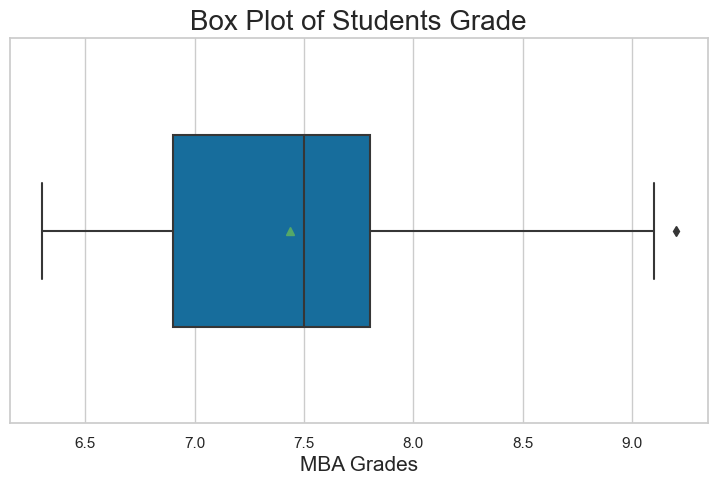

In [17]:
plt.figure(figsize=(9,5))
boxplot = sns.boxplot(x='mba_grades',
                 data=mba_df, showmeans=True,
                 width=0.5, 
                 palette="colorblind")
plt.title("Box Plot of Students Grade", fontsize=20)
plt.xlabel('MBA Grades', fontsize=15)

## Percentile Distribution

In [18]:
# Get the percentile distribution of the students grade
mba_df['mba_grades'].quantile([0,0.01,0.05,0.1,0.15,0.25,0.5,0.75,0.9,0.95,0.99,1]).to_frame().T

,0.00,0.01,0.05,0.10,0.15,0.25,0.50,0.75,0.90,0.95,0.99,1.00
mba_grades,6.3,6.5,6.5,6.79,6.8,6.9,7.5,7.8,8.2,8.6,9.001,9.2


## Analysis of Two Continuous Variables
## Scatter Plot

Text(0, 0.5, 'MBA Grades')

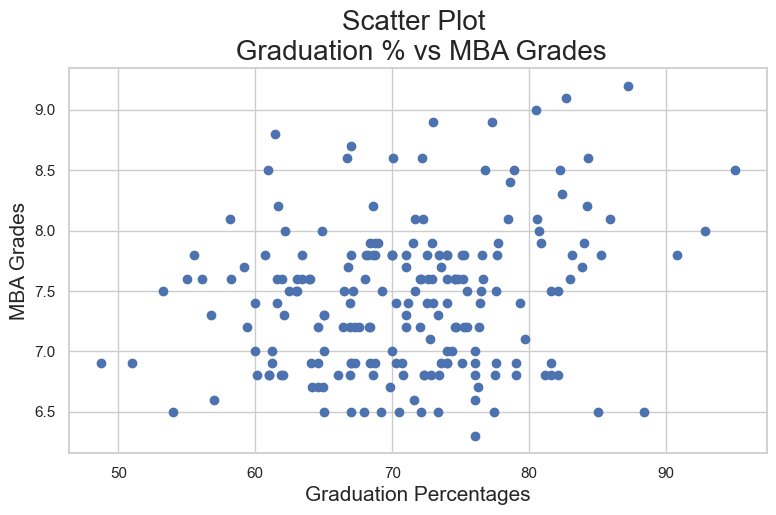

In [19]:
plt.figure(figsize=(9,5))
plt.scatter(x = mba_df["grad_pct"],
            y = mba_df['mba_grades'])

plt.title("Scatter Plot \n Graduation % vs MBA Grades", fontsize=20)
plt.xlabel('Graduation Percentages', fontsize=15)
plt.ylabel('MBA Grades', fontsize=15)

In [20]:
from scipy.stats import pearsonr
corr_1, pValue_1 = pearsonr(mba_df["grad_pct"], mba_df['mba_grades'])
print('between Graduation Percentages and MBA Grades is %.3f' % corr_1)


between Graduation Percentages and MBA Grades is 0.211


## Analysis of Two Categorical Variables
***
### Crosstab and Stacked Bar Plot

In [21]:
mba_df['mba_specialization'].value_counts()

mba_specialization
Finance               80
Marketing             70
Business Analytics    25
HR                    25
Name: count, dtype: int64

In [22]:
mba_df['grad_degree'].value_counts()

grad_degree
B.Com                    75
B.E. / B.Tech            63
B.B.A, B.M.S., Others    50
B.Sc                     12
Name: count, dtype: int64

### Crosstab Analysis - Stream vs MBA Specialization

In [23]:
pd.crosstab(mba_df['grad_degree'],
            mba_df['mba_specialization'],
            dropna = False,
            margins = True
           )

mba_specialization,Business Analytics,Finance,HR,Marketing,All
grad_degree,,,,,
"B.B.A, B.M.S., Others",5,18,10,17,50
B.Com,8,39,7,21,75
B.E. / B.Tech,10,22,5,26,63
B.Sc,2,1,3,6,12
All,25,80,25,70,200


### Row Proportions

In [24]:
pd.crosstab(mba_df['grad_degree'],
            mba_df['mba_specialization'],
            dropna = False,
            normalize = 'index'
           ).round(3)*100

mba_specialization,Business Analytics,Finance,HR,Marketing
grad_degree,,,,
"B.B.A, B.M.S., Others",10.0,36.0,20.0,34.0
B.Com,10.7,52.0,9.3,28.0
B.E. / B.Tech,15.9,34.9,7.9,41.3
B.Sc,16.7,8.3,25.0,50.0


### Column Proportions

In [25]:
pd.crosstab(mba_df['grad_degree'],
            mba_df['mba_specialization'],
            dropna = False,
            normalize = 'columns'
           ).round(3)*100


mba_specialization,Business Analytics,Finance,HR,Marketing
grad_degree,,,,
"B.B.A, B.M.S., Others",20.0,22.5,40.0,24.3
B.Com,32.0,48.8,28.0,30.0
B.E. / B.Tech,40.0,27.5,20.0,37.1
B.Sc,8.0,1.2,12.0,8.6


## Analysis of a Categorical and a Continuous Variable

In [26]:
# Get count of missing values
mba_df['mba_grades'].isnull().sum()

0

In [27]:
mba_df['gender'].value_counts()

gender
M    113
F     87
Name: count, dtype: int64

In [28]:
aggr = mba_df.groupby(['gender']).agg(
    {
        'mba_grades' : ['count','mean'] #, 'min','max','sum'
    }
)

aggr

mba_grades          
            count      mean
gender                     
F              87  7.510345
M             113  7.376106

### Box Plot - Graduation Stream vs Work Experience 

Text(0, 0.5, 'Grades')

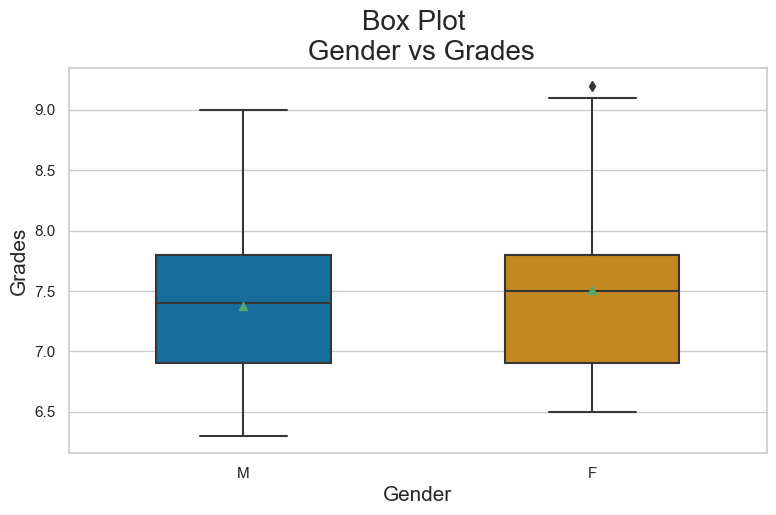

In [29]:
plt.figure(figsize=(9,5))
boxplot = sns.boxplot(
    x = 'gender', # Graduation Stream
    y='mba_grades',
    data=mba_df, showmeans=True,
    width=0.5, 
    palette="colorblind")
plt.title("Box Plot \n Gender vs Grades", fontsize=20)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Grades', fontsize=15)

### Distribution Plot - Gender vs Grades

In [30]:
gender_cat = list(mba_df["gender"].unique())
gender_cat

['M', 'F']

C:\Users\rjakh\anaconda3\envs\PyEnv3117\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


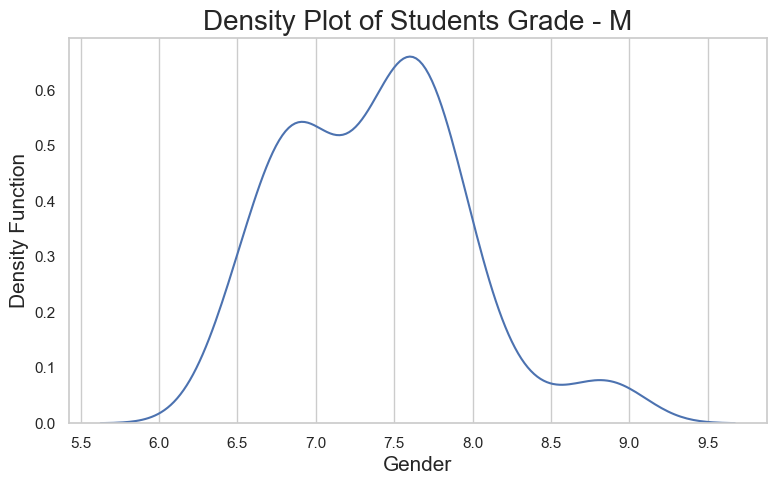

C:\Users\rjakh\anaconda3\envs\PyEnv3117\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


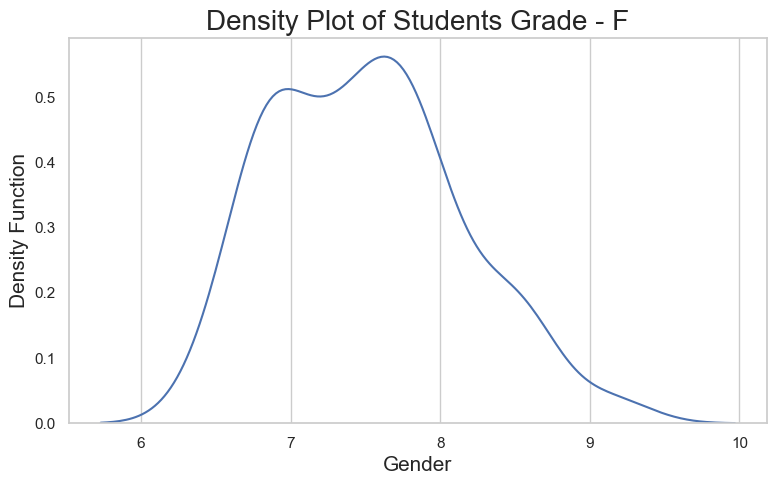

In [31]:
for g in gender_cat:
    # Subset to the airline
    plt.figure(figsize=(9,5))
    subset = mba_df[mba_df['gender'] == g]
    sns.kdeplot(subset.mba_grades)
    plt.title(g)
    plt.title(f"Density Plot of Students Grade - {g}", fontsize=20)
    plt.xlabel('Gender', fontsize=15)
    plt.ylabel('Density Function', fontsize=15)
    plt.grid(axis='y')
    plt.show()  

# Thank you 
